# Data import, Cleaning and EDA


#### The goal for this project use linear regression techniques in order to estimate the sales price of houses in Ames, Iowa.


This notebook contains data cleaning and EDA for train dataset

## Import Libriaries

In [334]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline

pd.set_option('display.max_rows', 1000) 
pd.set_option('display.max_columns', 500) 
pd.set_option('display.width', 1000)

## Load  Data

In [335]:
train = pd.read_csv('../datasets/train.csv')

The data set used in this project describes the sale of houses in Ames, Iowa from January 2006 to July 2010. 
The full data set contains 2930 observations and 81 attributes, of which 35 is quantitative, 43 categorical + Id and SalePrice

Data description http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

## Data Cleaning

In [336]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [337]:
train.shape

(2051, 81)

**Missing Values**

In [338]:
train.isnull().sum().sort_values(ascending=False)[:30]

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Cond        114
Garage Qual        114
Garage Yr Blt      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
Garage Area          1
Bsmt Unf SF          1
BsmtFin SF 2         1
Total Bsmt SF        1
BsmtFin SF 1         1
Overall Cond         0
Exterior 2nd         0
Exterior 1st         0
Roof Matl            0
dtype: int64

There are 26 columns with missing data

**From the data description I know that there is a category 'NA' for each categorical column (such as Pool QC, Misc Feature, Alley and others). But Pandas recognized the 'NA' as a missing value so I will replace them**

In [339]:
categotical_columns = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu', 'Garage Finish', 'Garage Cond', 
              'Garage Qual', 'Garage Type', 'Bsmt Exposure', 'BsmtFin Type 2', 'BsmtFin Type 1', 'Bsmt Cond', 
              'Bsmt Qual']

In [340]:
[train[x].replace(np.nan, 'NA', inplace=True) for x in categotical_columns]
train.isnull().sum().sort_values(ascending=False)[:15]

Lot Frontage      330
Garage Yr Blt     114
Mas Vnr Area       22
Mas Vnr Type       22
Bsmt Full Bath      2
Bsmt Half Bath      2
BsmtFin SF 1        1
Garage Cars         1
Garage Area         1
BsmtFin SF 2        1
Total Bsmt SF       1
Bsmt Unf SF         1
Exter Cond          0
Exter Qual          0
Year Remod/Add      0
dtype: int64

In [341]:
#Mas Vnr Type has category 'None' so replece Nan value None
train['Mas Vnr Type'].replace(np.nan, 'None',inplace=True )

**For most numeric data I've decided to replace them with 0<br>**
It makes sense because Nan values in the most numeric columns mean an absence of features (ex. Garage Area = 0 because there is no garage in the house)

In [342]:
numeric_columns = ['Garage Yr Blt', 'Mas Vnr Area','Bsmt Half Bath', 'Bsmt Full Bath', 'Garage Cars', 'Garage Area',
                   'Bsmt Unf SF', 'BsmtFin SF 2', 'Total Bsmt SF', 'BsmtFin SF 1']

In [343]:
[train[x].replace(np.nan, 0 , inplace=True) for x in numeric_columns]
train.isnull().sum().sort_values(ascending=False)[:10]

Lot Frontage    330
SalePrice         0
Exter Cond        0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Mas Vnr Area      0
Exter Qual        0
dtype: int64

**Lot Frontage missing values** 

In [344]:
#impute nan values by ('Neighborhood') median
train['Lot Frontage'] = train.groupby('Neighborhood')['Lot Frontage'].transform(lambda x: x.fillna(x.median()))

In [345]:
train['Lot Frontage'].isnull().sum()

3

In [346]:
#there is still 3 nan values in Lot Frontage, so I will impute it by median
train['Lot Frontage'] = train['Lot Frontage'].transform(lambda x: x.fillna(x.median()))

In [347]:
#check nan values 
train.isnull().sum().sort_values(ascending=False)[:10]

SalePrice         0
Total Bsmt SF     0
Year Remod/Add    0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Mas Vnr Area      0
Exter Qual        0
dtype: int64

**Data types**

In [348]:
#check dtypes
train.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

Data types looks correct

**Rename columns**

In [349]:
train.columns = train.columns.str.lower().str.replace(' ', '_')

In [350]:
train.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street', 'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style', 'overall_qual', 'overall_cond', 'year_built', 'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt', 'garage_finish', 'garage_cars', 'garage_area', 'garage_qual', 'garage_cond', 'paved_drive',
       '

## EDA

In [351]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2198.0,2930.0
pid,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,907180080.0,924152030.0
ms_subclass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,70.0,190.0
lot_frontage,2051.0,6.919722e+01,2.168874e+01,21.0,60.0,70.0,80.0,313.0
lot_area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,11513.5,159000.0
overall_qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.0,10.0
overall_cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.0,9.0
year_built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2001.0,2010.0
year_remod/add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2004.0,2010.0
mas_vnr_area,2051.0,9.862652e+01,1.743247e+02,0.0,0.0,0.0,159.0,1600.0


### Pairplot/outliers

In [352]:
#chose numeric features for pairplot
cols = ['lot_frontage','lot_area','year_built', 'year_remod/add',
        'bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf', 'total_bsmt_sf','1st_flr_sf', '2nd_flr_sf',
        'mas_vnr_area', 'mo_sold', 'yr_sold', 'fireplaces', 'misc_val','gr_liv_area',
        'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr',
        'garage_cars', 'garage_area','wood_deck_sf', 'open_porch_sf', 'screen_porch', 'pool_area',
       ]

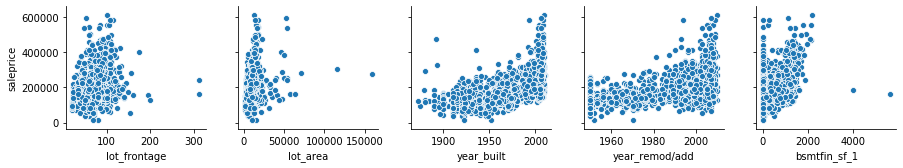

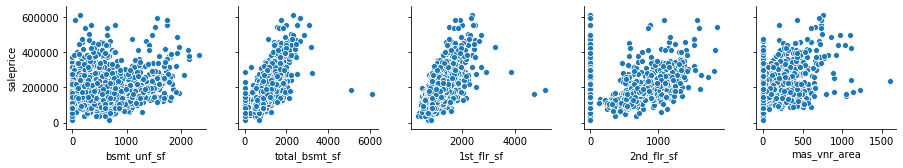

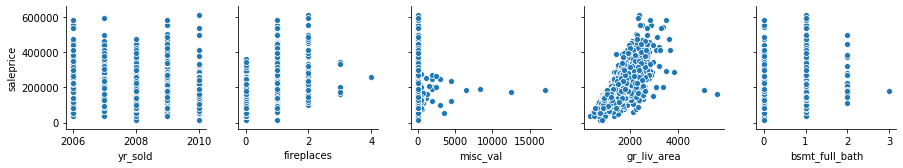

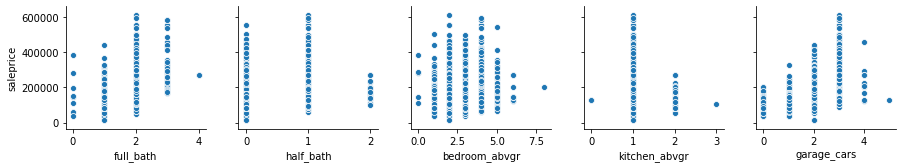

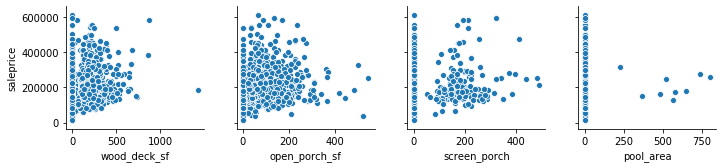

In [353]:
for i in range(0,30,6):
    sns.pairplot(train, y_vars=['saleprice'], x_vars=cols[i:i+5])

The Plots above show some outliers which can affect the linear regression model. 
I decided to remove the strongest outliers from the train dataset.

In [354]:
train = train[(train['lot_area']<150000)&(train['lot_frontage']<300)&
      (train['bsmtfin_sf_1']<4000)&(train['total_bsmt_sf']<6000)&
     (train['1st_flr_sf']<4000)&(train['gr_liv_area']<5000)]

In [355]:
train.shape #deleted 4 outliers 

(2047, 81)

### Skewness

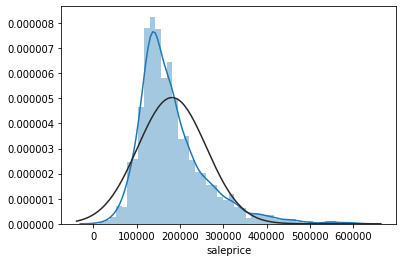

In [356]:
sns.distplot(train['saleprice'], fit=norm);

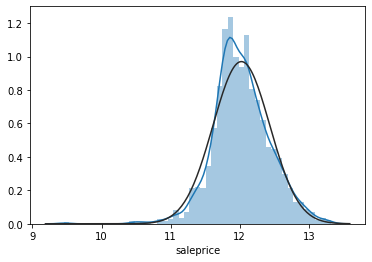

In [357]:
sns.distplot(np.log(train['saleprice']), fit=norm);

In [358]:
train.skew(axis = 0).sort_values(ascending=False)

misc_val           18.580145
pool_area          17.751030
3ssn_porch         11.815445
low_qual_fin_sf    11.489847
lot_area            6.049123
kitchen_abvgr       4.343389
bsmtfin_sf_2        4.236401
bsmt_half_bath      3.986147
screen_porch        3.854646
enclosed_porch      2.861210
mas_vnr_area        2.576349
open_porch_sf       2.243404
wood_deck_sf        2.019339
saleprice           1.559912
ms_subclass         1.379162
1st_flr_sf          0.964107
gr_liv_area         0.927909
bsmt_unf_sf         0.909389
2nd_flr_sf          0.876101
bsmtfin_sf_1        0.810562
totrms_abvgrd       0.779936
half_bath           0.744482
fireplaces          0.714024
overall_cond        0.639668
bsmt_full_bath      0.629442
lot_frontage        0.579495
total_bsmt_sf       0.425907
bedroom_abvgr       0.372197
mo_sold             0.214332
garage_area         0.154348
yr_sold             0.153155
overall_qual        0.138707
full_bath           0.110618
pid                 0.066421
id            

Skewness is a problem for linear regression. 
And there is a simple approach which can work well with this problem very well, it is log transformation. 
We have to use log transformation for skewed data. I will do it in Preprocessing and Feature engineering step

### Correlations/Heatmap

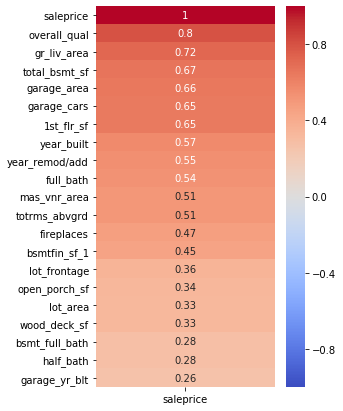

In [359]:
plt.figure(figsize=(4,7))
sns.heatmap(train.corr()[['saleprice']][train.corr()['saleprice'] >= 0.25].sort_values('saleprice',ascending=False),annot=True,cmap='coolwarm',vmin= -1);

Overall quality has the highest correlation with Saleprice among the numeric variables (0.8). It's on a scale from 1 (very poor) to 10 (very excellent)
Footage, year built and baths also have high correlations with Saleprice.

### Categorical variables

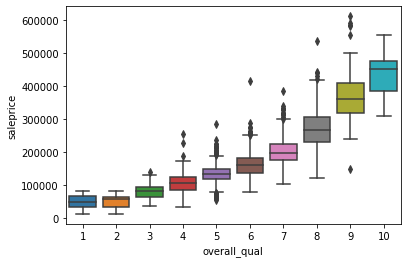

In [360]:
sns.boxplot(x='overall_qual', y='saleprice', data=train);

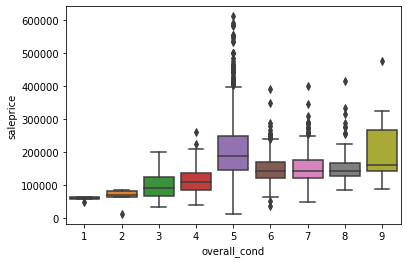

In [361]:
sns.boxplot(x='overall_cond', y='saleprice', data=train);

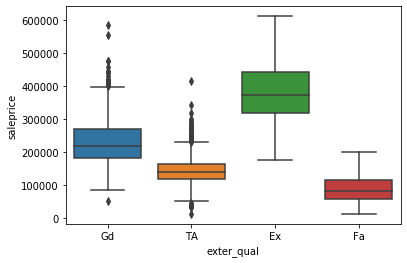

In [362]:
sns.boxplot(x='exter_qual', y='saleprice', data=train);

Overall_qual and Overall_cond show strong linear relationship with Sale Price.

### Export clean data to csv

Save clean dataset for next processing

In [363]:
train.to_csv('../datasets/train_clean.csv')

### Conclusions

- The dataset contains 81 explanatory variables (35 is quantitative, 43 categorical + Id and SalePrice) used to describe the house and evaluate its value.
- Overall_qual, Gr_liv_area and Total_bsmt_sf are strongly correlated with SalePrice.
- Garage_cars and garage_area are also some of the most strongly correlated variables but they are dependant from each other
- Saleprice and independent variables have skewness

### Nest steps

Nest step is to do the exact same cleaning manipulations with Test(Kaggle) dataset.

Based on EDA in Preprocessing step I need:

- reduce skewness using log transformation
- remove features which have high correlations between each other